In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
#import packages
import pandas as pd
from datetime import datetime
import numpy as np


#to plot within notebook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data

import seaborn as sns


#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,10

In [4]:
# import Dataset

df = pd.read_csv('/home/IOT-temp.csv', parse_dates=['noted_date'])

df.name = 'IOT'

In [7]:
# converting index to datetime format.
df["Date"] = pd.to_datetime(df["noted_date"], format="%d-%m-%Y %H:%M", errors="coerce")
#format="%d-%m-%Y %H:%M"→ Especifica que o dia vem antes do mês.
#dayfirst=True→ Ajuda na conversão quando há confusão entre dia e mês.
#errors="coerce"→ Converter valores inválidos para NaT(evita que o erro interrompa o código).

In [8]:
df.head(10)
# useless features encountered which can be dropped.

,id,room_id/id,noted_date,temp,out/in,Date
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In,2018-12-08 09:30:00
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In,2018-12-08 09:30:00
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out,2018-12-08 09:29:00
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out,2018-12-08 09:29:00
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In,2018-12-08 09:29:00
5,__export__.temp_log_196125_b0fa0b41,Room Admin,08-12-2018 09:29,31,In,2018-12-08 09:29:00
6,__export__.temp_log_196121_01544d45,Room Admin,08-12-2018 09:28,29,In,2018-12-08 09:28:00
7,__export__.temp_log_196122_f8b80a9f,Room Admin,08-12-2018 09:28,29,In,2018-12-08 09:28:00
8,__export__.temp_log_196111_6b7a0848,Room Admin,08-12-2018 09:26,29,In,2018-12-08 09:26:00
9,__export__.temp_log_196112_e134aebd,Room Admin,08-12-2018 09:26,29,In,2018-12-08 09:26:00


In [9]:
cols_drop = ['id', 'noted_date', 'room_id/id']

In [10]:
# dropping columns

df = df.drop(cols_drop, axis=1)

In [11]:
df.head(10)

# duplicate rows encountered in the dataset

,temp,out/in,Date
0,29,In,2018-12-08 09:30:00
1,29,In,2018-12-08 09:30:00
2,41,Out,2018-12-08 09:29:00
3,41,Out,2018-12-08 09:29:00
4,31,In,2018-12-08 09:29:00
5,31,In,2018-12-08 09:29:00
6,29,In,2018-12-08 09:28:00
7,29,In,2018-12-08 09:28:00
8,29,In,2018-12-08 09:26:00
9,29,In,2018-12-08 09:26:00


In [12]:
df.dtypes

,0
temp,int64
out/in,object
Date,datetime64[ns]


In [13]:
print("the dataset has shape = {}".format(df.shape))

the dataset has shape = (97606, 3)


In [14]:
rows_drop = ['temp', 'out/in', 'Date']

# dropping ALL duplicte rows with all same values.

df.drop_duplicates(subset = rows_drop,
                     keep = False, inplace = True)

In [15]:
df.describe()

# duplicate rows have been dropped

,temp,Date
count,23075.000000,23075
mean,38.068689,2018-10-14 19:35:25.058288128
min,22.000000,2018-07-28 07:08:00
25%,32.000000,2018-09-21 02:16:30
50%,39.000000,2018-10-17 04:40:00
75%,44.000000,2018-11-02 17:29:00
max,51.000000,2018-12-08 09:05:00
std,6.426103,NaN


In [17]:
# building new features for time stamp.

def features_build(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week
features_build(df)

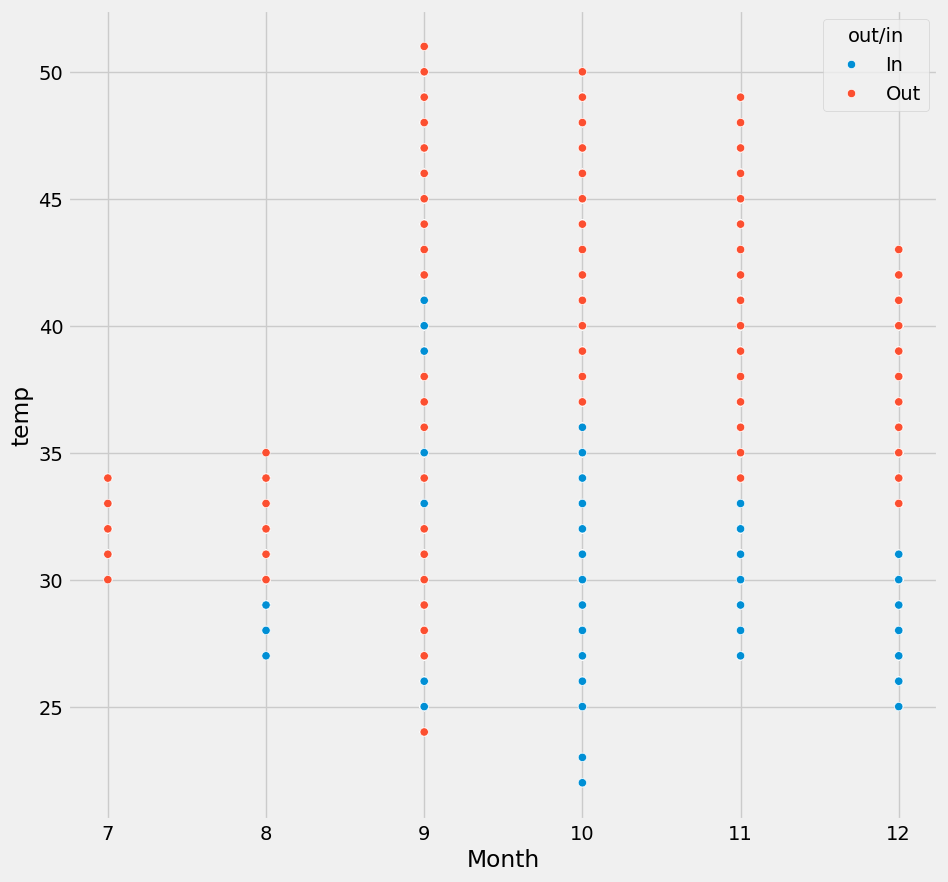

In [18]:
ax = sns.scatterplot(x="Month", y="temp", hue="out/in", data=df)

# plotting discrete tempt values for month time stamp.